# Plot of theoretical asymptotic variance and confidence interval size computed in Proposition 10

We plot $\sqrt{V(s)}$ and $D(s)$ against $s$, where
$$
    V(s) := (1+4s^2)^{-1/2} - (1+2s^2)^{-1}, \qquad D(s):=\exp(-s^2 \pi_l) - \exp(-s^2 \pi_u),
$$
and $\pi_l$ and $\pi_u$ are respectively $2.5$ and $97.5$ percentiles of a $\chi^2_1$ random variable.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import chi2

plt.rcParams.update({ 
    "text.usetex": True,
    "font.weight": "heavy",
    "font.size": 14,
    "text.latex.preamble": r"\usepackage{amsmath}"
})

lw = 2 #line width of plot
anno_v_frac = 0.098 # for adjusting position of text annotation

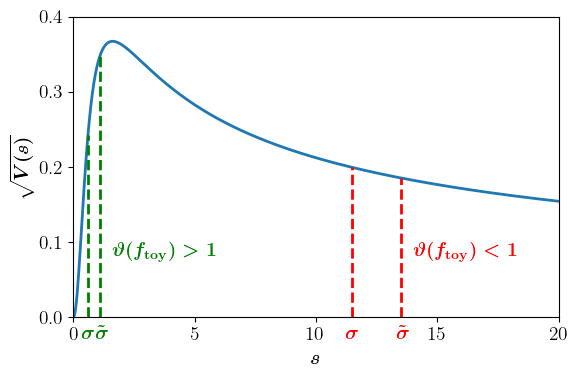

In [3]:
s_list = np.linspace(0, 30, 1000)
f = lambda x: np.sqrt((1+4*(x**2))**(-1/2) - (1+2*(x**2))**(-1))
f_s_list = [f(s) for s in s_list]

fig = plt.figure(figsize=(6, 4), dpi=100)

plt.plot(s_list,f_s_list, linewidth=lw)
plt.xlabel(r"$\boldsymbol{s}$", labelpad=5)
plt.ylabel(r"$\boldsymbol{\sqrt{V(s)}}$")

v_points_1 = [0.6, 1.1]
v_points_2 = [11.5, 13.5]
plt.vlines(v_points_1, [0,0], [f(x) for x in v_points_1], 'green', 'dashed', linewidth=lw)
plt.vlines(v_points_2, [0,0], [f(x) for x in v_points_2], 'red', 'dashed', linewidth=lw)
plt.annotate(r'$\boldsymbol{\sigma}$',(0.135, anno_v_frac), xycoords='figure fraction', color='green')
plt.annotate(r'$\boldsymbol{\tilde{\sigma}}$',(0.158, anno_v_frac), xycoords='figure fraction', color='green')
plt.text(v_points_1[1]+0.5, 0.08, r'$\boldsymbol{\vartheta(f_{\rm toy}) > 1}$', color='green')
plt.annotate(r'$\boldsymbol{\sigma}$',(0.575, anno_v_frac), xycoords='figure fraction', color='red')
plt.annotate(r'$\boldsymbol{\tilde{\sigma}}$',(0.66, anno_v_frac), xycoords='figure fraction', color='red')
plt.text(v_points_2[1]+0.5, 0.08, r'$\boldsymbol{\vartheta(f_{\rm toy}) < 1}$', color='red')

plt.xlim([0, 20.0])
plt.ylim([0,0.4])
plt.locator_params(axis='x', nbins=5)
plt.tight_layout()
plt.savefig("fig3_plot_expnegchi_1D_std.pdf", dpi=fig.dpi, bbox_inches='tight')

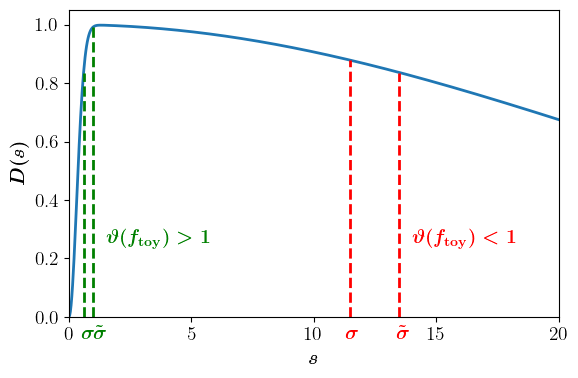

In [4]:
s_list = np.linspace(0, 30, 1000)
alpha = 0.05
f = lambda x: np.exp(-(x**2)*chi2.ppf(alpha/2, df=1))-np.exp(-(x**2)*chi2.ppf(1-alpha/2, df=1))
f_s_list = [f(s) for s in s_list]

v_points_1 = [0.6, 1]
v_points_2 = [11.5, 13.5]

fig = plt.figure(figsize=(6, 4), dpi=100)

plt.plot(s_list,f_s_list, linewidth=lw)
plt.vlines(v_points_1, [0,0], [f(x) for x in v_points_1], 'green', 'dashed', linewidth=lw)
plt.vlines(v_points_2, [0,0], [f(x) for x in v_points_2], 'red', 'dashed', linewidth=lw)
plt.xlabel(r"$\boldsymbol{s}$", labelpad=5)
plt.ylabel(r"$\boldsymbol{D(s)}$")
plt.annotate(r'$\boldsymbol{\sigma}$',(0.135, anno_v_frac), xycoords='figure fraction', color='green')
plt.annotate(r'$\boldsymbol{\tilde{\sigma}}$',(0.155, anno_v_frac), xycoords='figure fraction', color='green')
plt.text(v_points_1[1]+0.5, 0.25, r'$\boldsymbol{\vartheta(f_{\rm toy}) > 1}$', color='green')
plt.annotate(r'$\boldsymbol{\sigma}$',(0.575, anno_v_frac), xycoords='figure fraction', color='red')
plt.annotate(r'$\boldsymbol{\tilde{\sigma}}$',(0.66, anno_v_frac), xycoords='figure fraction', color='red')
plt.text(v_points_2[1]+0.5, 0.25, r'$\boldsymbol{\vartheta(f_{\rm toy}) < 1}$', color='red')
plt.ylim([0,1.05])
plt.xlim([0,20.0])
plt.locator_params(axis='x', nbins=5)
plt.tight_layout()
plt.savefig("fig3_plot_expnegchi_1D_ci_width.pdf", dpi=fig.dpi, bbox_inches='tight')